4. Implementar los algoritmos de Euler, de Heun, y de Taylor de orden 2 para resolver computacionalmente una EDO. Utilizar
estos métodos para resolver las siguientes ecuaciones diferenciales:

- dy/dx = 22e^(x/5) − 5x − 25, y(0) = −3, en el intervalo [0, 5];


In [11]:
import numpy as np

def f(x, y):
    return 22 * np.exp(x/5) - 5*x - 25

def euler_method(f, x0, y0, x_end, h):
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])
    return x, y

def heun_method(f, x0, y0, x_end, h):
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i], y[i-1] + h * k1)
        y[i] = y[i-1] + 0.5 * h * (k1 + k2)
    return x, y

def taylor2_method(f, x0, y0, x_end, h):
    x = np.arange(x0, x_end + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        df_dx = 22/5 * np.exp(x[i-1]/5) - 5  # df/dx = d/dx(22e^(x/5) - 5x - 25)
        df_dy = 0  # df/dy = 0 (la función no depende de y)
        y[i] = y[i-1] + h * f(x[i-1], y[i-1]) + 0.5 * h**2 * (df_dx + df_dy * f(x[i-1], y[i-1]))
    return x, y
# Parámetros
x0, y0 = 0, -3
x_end = 5
h = 0.1  # Tamaño del paso

# Aplicar los métodos
x_euler, y_euler = euler_method(f, x0, y0, x_end, h)
x_heun, y_heun = heun_method(f, x0, y0, x_end, h)
x_taylor2, y_taylor2 = taylor2_method(f, x0, y0, x_end, h)

# Imprimir resultados
"""
print("Euler Method:")
for x, y in zip(x_euler, y_euler):
    print(f"x = {x:.1f}, y = {y:.4f}")

print("\nHeun Method:")
for x, y in zip(x_heun, y_heun):
    print(f"x = {x:.1f}, y = {y:.4f}")

print("\nTaylor Order 2 Method:")
for x, y in zip(x_taylor2, y_taylor2):
    print(f"x = {x:.1f}, y = {y:.4f}")

"""

'\nprint("Euler Method:")\nfor x, y in zip(x_euler, y_euler):\n    print(f"x = {x:.1f}, y = {y:.4f}")\n\nprint("\nHeun Method:")\nfor x, y in zip(x_heun, y_heun):\n    print(f"x = {x:.1f}, y = {y:.4f}")\n\nprint("\nTaylor Order 2 Method:")\nfor x, y in zip(x_taylor2, y_taylor2):\n    print(f"x = {x:.1f}, y = {y:.4f}")\n\n'

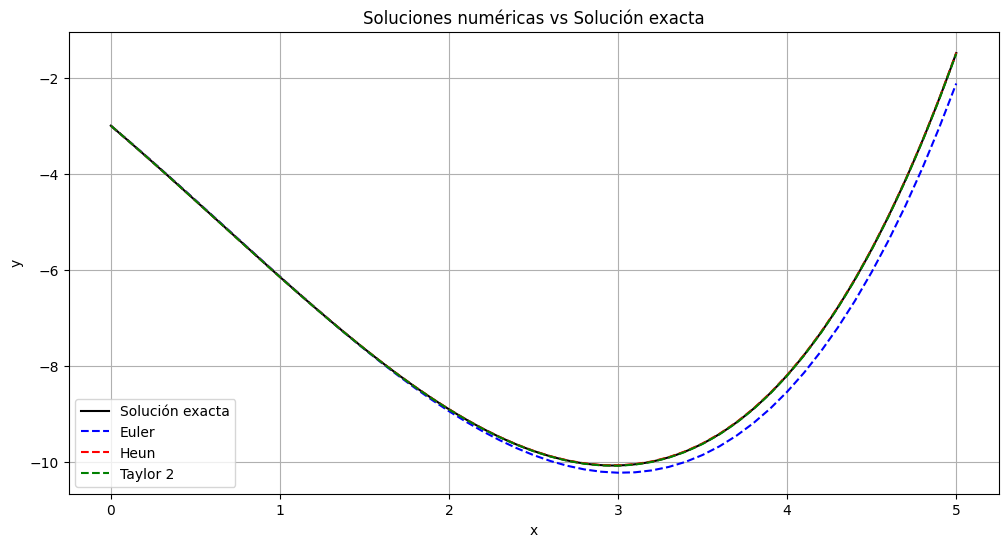

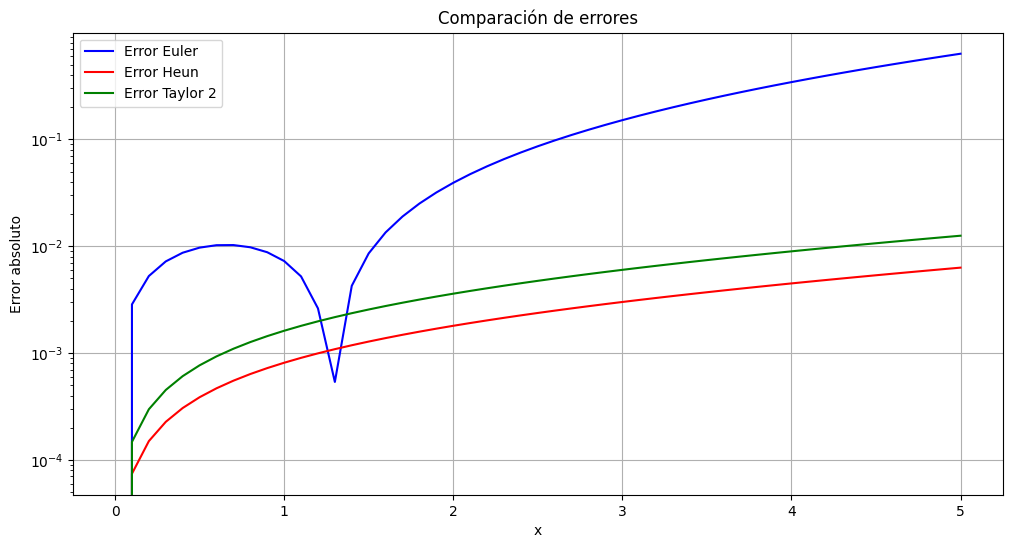

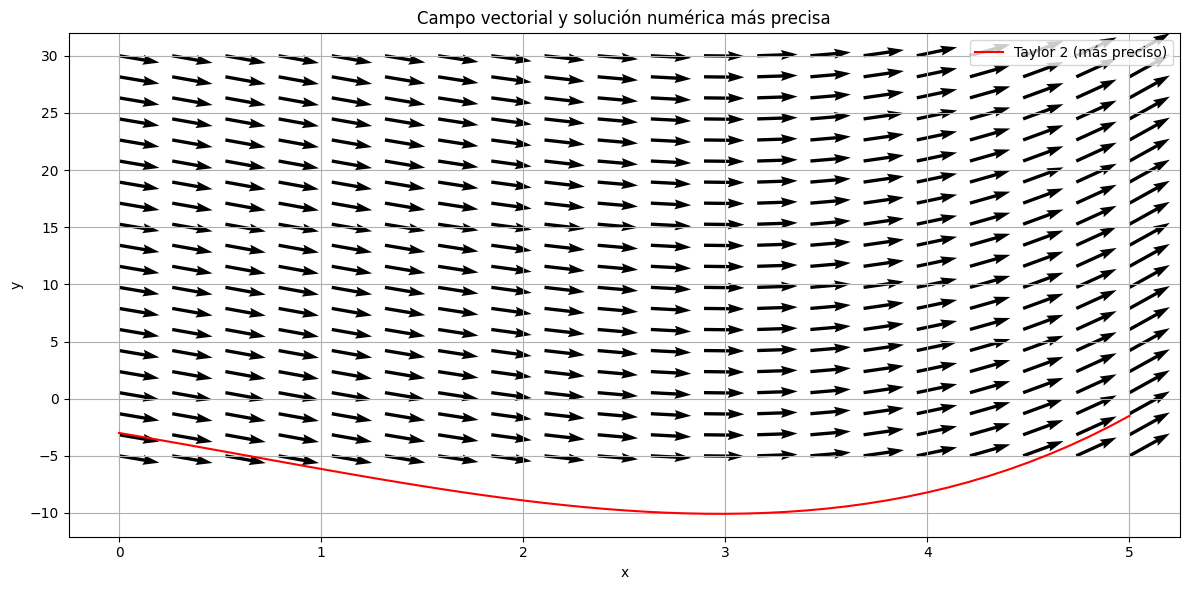

In [13]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Solución exacta
def ode(y, x):
    return f(x, y)

x_exact = np.linspace(x0, x_end, 1000)
y_exact = odeint(ode, y0, x_exact)

# Gráfica 1: Soluciones numéricas vs solución exacta
plt.figure(figsize=(12, 6))
plt.plot(x_exact, y_exact, 'k-', label='Solución exacta')
plt.plot(x_euler, y_euler, 'b--', label='Euler')
plt.plot(x_heun, y_heun, 'r--', label='Heun')
plt.plot(x_taylor2, y_taylor2, 'g--', label='Taylor 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Soluciones numéricas vs Solución exacta')
plt.legend()
plt.grid(True)

# Cálculo de errores
error_euler = np.abs(y_euler - np.interp(x_euler, x_exact, y_exact.flatten()))
error_heun = np.abs(y_heun - np.interp(x_heun, x_exact, y_exact.flatten()))
error_taylor2 = np.abs(y_taylor2 - np.interp(x_taylor2, x_exact, y_exact.flatten()))

# Gráfica de errores
plt.figure(figsize=(12, 6))
plt.semilogy(x_euler, error_euler, 'b-', label='Error Euler')
plt.semilogy(x_heun, error_heun, 'r-', label='Error Heun')
plt.semilogy(x_taylor2, error_taylor2, 'g-', label='Error Taylor 2')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.title('Comparación de errores')
plt.legend()
plt.grid(True)

# Gráfica 2: Campo vectorial y solución más precisa
plt.figure(figsize=(12, 6))
X, Y = np.meshgrid(np.linspace(0, 5, 20), np.linspace(-5, 30, 20))
U = np.ones_like(X)  # Cambiamos esto para que tenga la misma forma que X e Y
V = f(X, Y)
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=5, width=0.003)
plt.plot(x_taylor2, y_taylor2, 'r-', label='Taylor 2 (más preciso)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo vectorial y solución numérica más precisa')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

- dy/dt = −sint, y(0) = 1, en el intervalo [0, 6π]

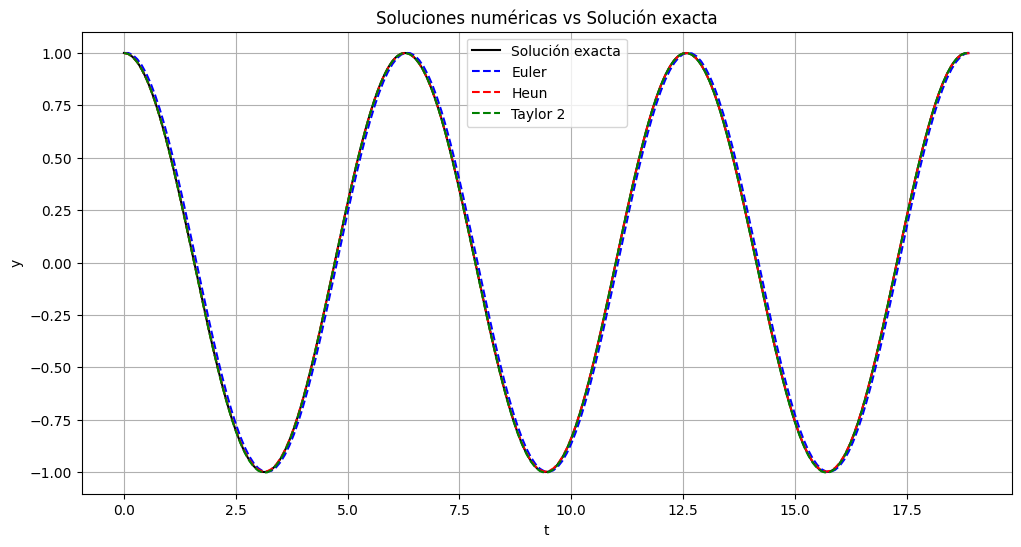

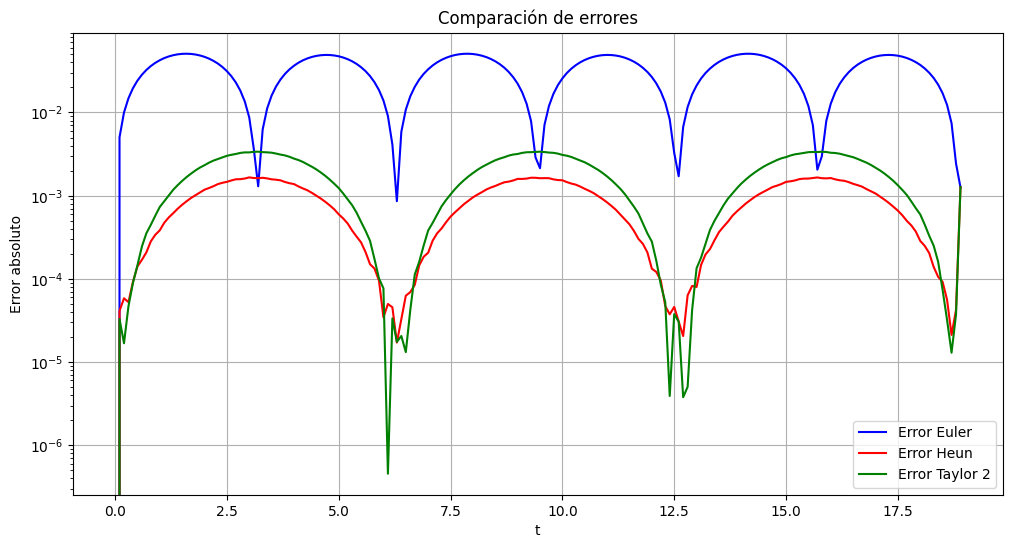

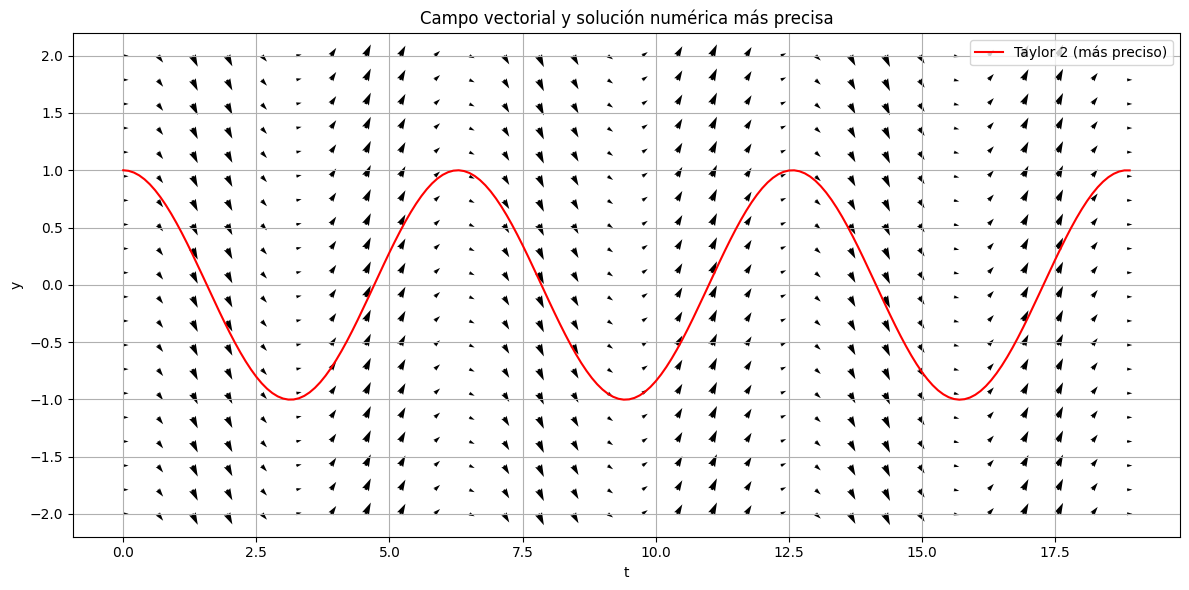

In [17]:

def f(t, y):
    return -np.sin(t)


# Parámetros
t0, y0 = 0, 1
t_end = 6 * np.pi
h = 0.1

# Aplicar los métodos
t_euler, y_euler = euler_method(f, t0, y0, t_end, h)
t_heun, y_heun = heun_method(f, t0, y0, t_end, h)
t_taylor2, y_taylor2 = taylor2_method(f, t0, y0, t_end, h)

# Solución exacta
def ode(y, t):
    return f(t, y)

t_exact = np.linspace(t0, t_end, 1000)
y_exact = odeint(ode, y0, t_exact)

# Gráfica 1: Soluciones numéricas vs solución exacta
plt.figure(figsize=(12, 6))
plt.plot(t_exact, y_exact, 'k-', label='Solución exacta')
plt.plot(t_euler, y_euler, 'b--', label='Euler')
plt.plot(t_heun, y_heun, 'r--', label='Heun')
plt.plot(t_taylor2, y_taylor2, 'g--', label='Taylor 2')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Soluciones numéricas vs Solución exacta')
plt.legend()
plt.grid(True)

# Cálculo de errores
error_euler = np.abs(y_euler - np.interp(t_euler, t_exact, y_exact.flatten()))
error_heun = np.abs(y_heun - np.interp(t_heun, t_exact, y_exact.flatten()))
error_taylor2 = np.abs(y_taylor2 - np.interp(t_taylor2, t_exact, y_exact.flatten()))

# Gráfica de errores
plt.figure(figsize=(12, 6))
plt.semilogy(t_euler, error_euler, 'b-', label='Error Euler')
plt.semilogy(t_heun, error_heun, 'r-', label='Error Heun')
plt.semilogy(t_taylor2, error_taylor2, 'g-', label='Error Taylor 2')
plt.xlabel('t')
plt.ylabel('Error absoluto')
plt.title('Comparación de errores')
plt.legend()
plt.grid(True)

# Gráfica 2: Campo vectorial y solución más precisa
plt.figure(figsize=(12, 6))
T, Y = np.meshgrid(np.linspace(0, 6*np.pi, 30), np.linspace(-2, 2, 20))
U = np.ones_like(T)
V = f(T, Y)
plt.quiver(T, Y, U, V, angles='xy', scale_units='xy', scale=10, width=0.003)
plt.plot(t_taylor2, y_taylor2, 'r-', label='Taylor 2 (más preciso)')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Campo vectorial y solución numérica más precisa')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()